In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")
!pip install yfinance --upgrade --no-cache-dir
# !pip install -r requirements.txt 
# !python setup.py install
# from pip._internal import main as install

# install(["install","ta-lib"])
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib 
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import yfinance as yf
import talib as ta

     |████████████████████████████████| 6.4 MB 7.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
--2021-12-20 05:07:44--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-20 05:07:44--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.ne

In [68]:
symbol = 'RELIANCE.NS'
start = '2017-01-01'
end = '2018-01-01'

tickerData = yf.Ticker(symbol)

# Read data 
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-02,523.164339,526.060055,517.541749,523.695190,3275674,0.0,0.0
2017-01-03,525.987640,529.438413,521.764677,525.770447,2969384,0.0,0.0
2017-01-04,527.459718,527.507950,513.656685,515.032166,4796129,0.0,0.0
2017-01-05,516.890301,521.185643,515.804392,519.979065,4030815,0.0,0.0
2017-01-06,518.434559,523.646907,517.903648,518.796509,3620853,0.0,0.0


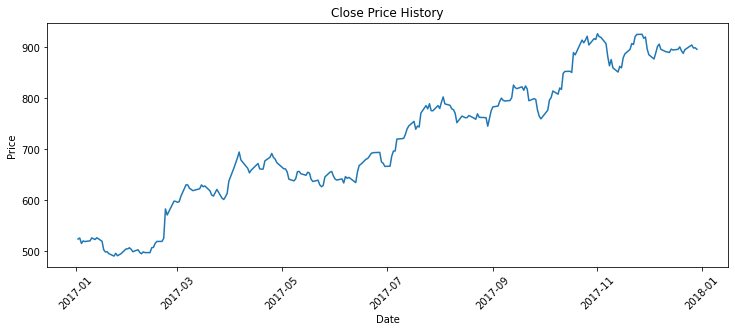

In [69]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

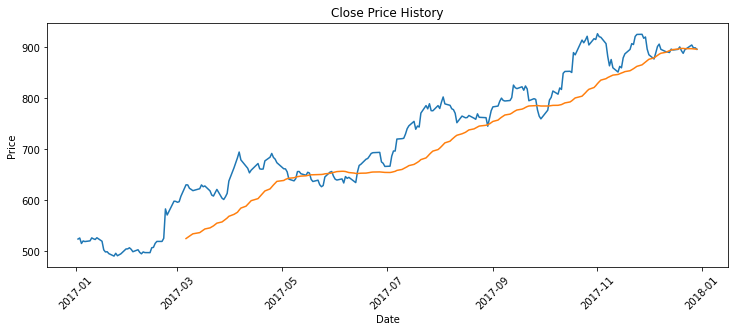

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA44
Date,,,,,,,,
2017-01-02,523.164339,526.060055,517.541749,523.695190,3275674,0.0,0.0,NaN
2017-01-03,525.987640,529.438413,521.764677,525.770447,2969384,0.0,0.0,NaN
2017-01-04,527.459718,527.507950,513.656685,515.032166,4796129,0.0,0.0,NaN
2017-01-05,516.890301,521.185643,515.804392,519.979065,4030815,0.0,0.0,NaN
2017-01-06,518.434559,523.646907,517.903648,518.796509,3620853,0.0,0.0,NaN


In [70]:
df['SMA44'] = ta.SMA(df.Close, timeperiod = 44)
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.plot(df['SMA44'])
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
df.head()

In [71]:
def buy_sell(df, alpha):
    BUY = []
    SELL = []
    ind = []
    i=0
    number_of_trades=0
    number_of_profitable_trades=0
    initial_money=100000
    profit=0
    
    while(i<len(df)):
      if(abs(df['SMA44'][i-2] - df['Close'][i-2])<=(df['Close'][i-2]*2/100)):
        t1=0
        for ui in range(18):
          if(df['SMA44'][i-ui-2]>df['SMA44'][i-ui-1]):
            t1=t1+1
        t =0
        for u in range(18):
          if(df['SMA44'][i-u-2]<df['SMA44'][i-u-1]):
            t=t+1
        if(t>=alpha):
          if((df['Open'][i-1]<df['Close'][i-1]) and (max(df['Open'][i-1],df['Close'][i-1])>max(df['Open'][i-2],df['Close'][i-2]))):
            number_of_trades = number_of_trades + 1
            BUY.append(df['Open'][i])
            SELL.append(np.nan)
            buy_price = df['Open'][i]

            exit = buy_price + 3*(abs(buy_price - min(df['Open'][i-1],min(df['Close'][i-1],min(df['Open'][i-2],df['Close'][i-2])))))
            stop_loss =  min(df['Open'][i-1],min(df['Close'][i-1],min(df['Open'][i-2],df['Close'][i-2])))
            i=i+1
            while(df['Close'][i]<exit and df['Close'][i]>stop_loss):
                if(i>=len(df)-1):
                    break
                BUY.append(np.nan)
                SELL.append(np.nan)
                i=i+1
            if(i<len(df)-1):
                if(df['Close'][i]>buy_price):
                    number_of_profitable_trades=number_of_profitable_trades+1
                profit+=df['Close'][i] - buy_price
                initial_money = initial_money/buy_price*df['Close'][i]
                BUY.append(np.nan)
                SELL.append(df['Close'][i])

        
        elif(t1>=alpha):
          if((df['Open'][i-1]>df['Close'][i-1]) and (max(df['Open'][i-1],df['Close'][i-1])<max(df['Open'][i-2],df['Close'][i-2]))):
            number_of_trades = number_of_trades + 1
            SELL.append(df['Open'][i])
            BUY.append(np.nan)
            sell_price = df['Open'][i]
            exit = sell_price - 3*(abs(sell_price - max(df['Open'][i-1],max(df['Close'][i-1],max(df['Open'][i-2],df['Close'][i-2])))))
            stop_loss = max(df['Open'][i-1],max(df['Close'][i-1],max(df['Open'][i-2],df['Close'][i-2])))
            i=i+1
            while(df['Close'][i]>exit and df['Close'][i]<stop_loss):
                if(i>=len(df)-1):
                    break
                BUY.append(np.nan)
                SELL.append(np.nan)
                i=i+1
            if(i<len(df)-1):
                if(df['Close'][i]<sell_price):
                    number_of_profitable_trades=number_of_profitable_trades+1
                profit-=df['Close'][i] - sell_price
                initial_money = initial_money/df['Close'][i]*sell_price
                SELL.append(np.nan)
                BUY.append(df['Close'][i])
      else:
        BUY.append(np.nan)
        SELL.append(np.nan)
      i = i+1
      ind.append(i)
    
    return (BUY, SELL, ind, number_of_profitable_trades/number_of_trades, profit, initial_money-100000)



In [72]:
alpha = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]

In [73]:
max_profit_trades=0
for j in alpha:
    buy, sell, i, profit_trades, profit, profit2 = buy_sell(df, j)
    print(j, " ", profit_trades, " ", profit, "\n")

5.0   0.6   196.13588492632766 

6.0   0.6   196.13588492632766 

7.0   0.6   196.13588492632766 

8.0   0.6   196.13588492632766 

9.0   0.6   196.13588492632766 

10.0   0.6   196.13588492632766 

11.0   0.6   196.13588492632766 

12.0   0.6   196.13588492632766 

13.0   0.6   196.13588492632766 

14.0   0.6   196.13588492632766 



In [74]:
buy, sell, i, profit_trades, profit, profit2 = buy_sell(df, 8.0)

In [75]:
len(buy)

239

In [77]:
buy.insert(0,np.nan)
sell.insert(0,np.nan)
buy.insert(0,np.nan)
sell.insert(0,np.nan)
buy.insert(0,np.nan)
sell.insert(0,np.nan)
buy.insert(0,np.nan)
sell.insert(0,np.nan)
buy.insert(0,np.nan)
sell.insert(0,np.nan)
buy.insert(0,np.nan)
sell.insert(0,np.nan)
buy.insert(0,np.nan)
sell.insert(0,np.nan)
buy.insert(0,np.nan)
sell.insert(0,np.nan)

In [79]:
buy.insert(0,np.nan)
sell.insert(0,np.nan)

In [76]:
len(df)

248

In [78]:
len(buy)

247

In [63]:
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)

In [65]:
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)
# buy.append(np.nan)
# sell.append(np.nan)

In [80]:
df['BUY'] = buy
df['SELL'] = sell

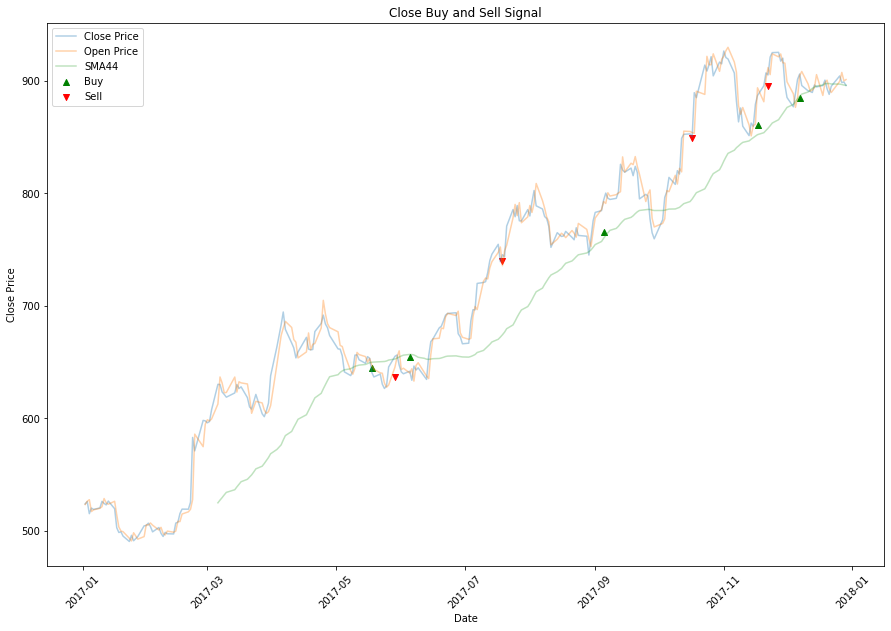

In [81]:
plt.figure(figsize=(15,10))
plt.scatter(df.index,df['BUY'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['SELL'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.plot(df['Open'],label='Open Price',alpha=0.35)
plt.plot(df['SMA44'], label = 'SMA44', alpha=0.3)
plt.title('Close Buy and Sell Signal')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
profit*100

19613.57638920322

In [ ]:
profit_trades*100

60.0

In [ ]:
df['BUY'].tail(50)

Date
2017-10-19           NaN
2017-10-23           NaN
2017-10-24           NaN
2017-10-25           NaN
2017-10-26           NaN
2017-10-27           NaN
2017-10-30           NaN
2017-10-31           NaN
2017-11-01           NaN
2017-11-02           NaN
2017-11-03    884.816517
2017-11-06           NaN
2017-11-07           NaN
2017-11-08           NaN
2017-11-09           NaN
2017-11-10           NaN
2017-11-13           NaN
2017-11-14           NaN
2017-11-15           NaN
2017-11-16           NaN
2017-11-17           NaN
2017-11-20           NaN
2017-11-21           NaN
2017-11-22           NaN
2017-11-23           NaN
2017-11-24           NaN
2017-11-27           NaN
2017-11-28           NaN
2017-11-29           NaN
2017-11-30           NaN
2017-12-01           NaN
2017-12-04           NaN
2017-12-05           NaN
2017-12-06           NaN
2017-12-07           NaN
2017-12-08           NaN
2017-12-11           NaN
2017-12-12           NaN
2017-12-13           NaN
2017-12-14          